In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:

df = pd.read_csv('processed_ml_dataset.csv')
print('Dimension of dataset= ', df.shape)
df.head() # To get first n rows from the dataset default value of n is 5

Dimension of dataset=  (1105, 7)


,Type,Lat,Lon,Floor Size(SQFT),Number of Rooms,Number of Bathroom,Amount(BDT)
0,1,24.782145,80.415916,398,4,6,80000
1,1,23.874777,90.388188,900,2,2,19000
2,1,23.874777,90.388188,900,2,2,19000
3,1,23.871732,90.397145,1610,3,4,50000
4,1,23.874777,90.388188,950,2,2,20000


In [4]:
X = df.values[:, 0:6]  # get input values from first two columns
y = df.values[:, 2]  # get output values from last coulmn
m = len(y) # Number of training examples

print('Total no of training examples (m) = %s \n' %(m))

# Show only first 5 records
for i in range(5):
    print('X =', X[i, ], ', y =', y[i])

Total no of training examples (m) = 1105 

X = [  1.        24.782145  80.415916 398.         4.         6.      ] , y = 80.415916
X = [  1.        23.874777  90.388188 900.         2.         2.      ] , y = 90.388188
X = [  1.        23.874777  90.388188 900.         2.         2.      ] , y = 90.388188
X = [1.0000000e+00 2.3871732e+01 9.0397145e+01 1.6100000e+03 3.0000000e+00
 4.0000000e+00] , y = 90.397145
X = [  1.        23.874777  90.388188 950.         2.         2.      ] , y = 90.388188


In [5]:
from sklearn.model_selection import train_test_split
seed = 77
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=seed)

In [6]:
model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(X_train,y_train)
#model_ols.fit(X,y)
# fit() method is used for training the model
# Note the first parameter(feature) is must be 2D array(feature matrix)


D:\Projects\House_rent_prediction\venv\Scripts\env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [7]:
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [8]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [ 0.00000000e+00  1.65044982e-14  1.00000000e+00 -1.03472164e-19
  2.48443445e-17 -1.42783434e-16]
intercept=  -5.115907697472721e-13


In [9]:
predictedPrice = pd.DataFrame(model_ols.predict(X_test), columns=['Predicted Price']) # Create new dataframe of column'Predicted Price'
actualPrice = pd.DataFrame(y_test, columns=['Actual Price'])
actualPrice = actualPrice.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualPrice,predictedPrice],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
Actual Price,90.415916,90.419844,90.387987,90.347604,90.419844,90.419844,90.371518,90.371989,90.372253,90.393137,...,90.442878,90.387723,90.397145,90.419844,90.390566,90.371518,90.411376,90.371518,90.385814,90.433234
Predicted Price,90.415916,90.419844,90.387987,90.347604,90.419844,90.419844,90.371518,90.371989,90.372253,90.393137,...,90.442878,90.387723,90.397145,90.419844,90.390566,90.371518,90.411376,90.371518,90.385814,90.433234


Text(0.5, 1.0, 'Price From Dataset Vs Price Predicted By Model')

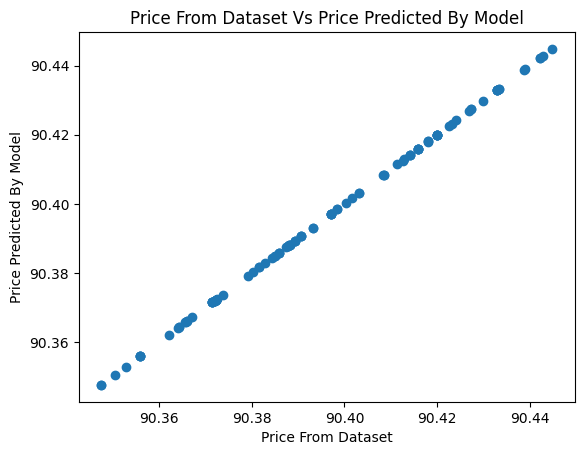

In [10]:
plt.scatter(y_test, model_ols.predict(X_test))
plt.xlabel('Price From Dataset')
plt.ylabel('Price Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Price From Dataset Vs Price Predicted By Model")

In [14]:
import sklearn.metrics as sm
y_test_pred = model_ols.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))
print(model_ols.predict(X_test))

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0
[90.415916   90.419844   90.387987   90.347604   90.419844   90.419844
 90.371518   90.371989   90.372253   90.393137   90.41422    90.367211
 90.352794   90.432902   90.364187   90.3850278  90.371989   90.389312
 90.400296   90.356001   90.387987   90.423114   90.397145   90.365664
 90.414203   90.364284   90.415916   90.429871   90.371518   90.427297
 90.389312   90.385814   90.442058   90.347604   90.365737   90.418059
 90.415916   90.366118   90.415916   90.403087   90.43861    90.414203
 90.372253   90.433325   90.424109   90.444809   90.41282206 90.39841137
 90.419844   90.380301   90.39841137 90.419844   90.393137   90.388188
 90.3850278  90.381654   90.415916   90.35055    90.422618   90.427297
 90.3844492  90.362106   90.401712   90.442058   90.412525   90.373744
 90.379163   90.397145   90.390566   90.40844    90.432902   90.387467
 90.41791    90.432902 

In [12]:
# test model with a random feature list
feature_to_predict = [[2.00000000e+00, 2.47821450e+01, 8.04159160e+01, 3.98000000e+03,
  4.00000000e+00, 6.00000000e+00]]
print("Feature to predict: ", feature_to_predict)
print("predicted value: ",model_ols.predict(feature_to_predict))

Feature to predict:  [[2.0, 24.782145, 80.415916, 3980.0, 4.0, 6.0]]
predicted value:  [80.415916]
